In [ ]:
text = '''경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다'''

- 토큰화

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

t = Tokenizer()

# 문장 분석
t.fit_on_texts([text])

# 분석된 단어의 목록을 확인
t.word_docs

defaultdict(int,
            {'뛰고': 1,
             '있다': 1,
             '그의': 1,
             '오는': 1,
             '곱다': 1,
             '법이다': 1,
             '가는': 1,
             '고와야': 1,
             '말이': 1,
             '경마장에': 1,
             '있는': 1})

In [ ]:
# 단어의 수를 저장
vocab_size = len(t.word_docs) + 1 # 0번 인덱스는 안써서 +1해줌

vocab_size

12

- 정수 인코딩

In [ ]:
seq = []

# 문장을 한 줄씩 읽어온다
for line in text.split("\n"):
  encoded = t.texts_to_sequences([line])[0]

  # 조합 가능한 단어 조합을 생성
  for i in range(1, len(encoded)):
    s = encoded[:i+1]
    seq.append(s)

seq

# 경마장에 있는 말이 뛰고 있다
  # 경마장에 있는
  # 경마장에 있는 말이
  # 경마장에 있는 말이 뛰고
  # 경마장에 있는 말이 뛰고 있다

# 그의 말이 법이다
  # 그의 말이
  # 그의 말이 법이다

# 가는 말이 고와야 오는 말이 곱다
  # 가는 말이
  # 가는 말이 고와야
  # 가는 말이 고와야 오는
  # 가는 말이 고와야 오는 말이
  # 가는 말이 고와야 오는 말이 곱다

[[2, 3],
 [2, 3, 1],
 [2, 3, 1, 4],
 [2, 3, 1, 4, 5],
 [6, 1],
 [6, 1, 7],
 [8, 1],
 [8, 1, 9],
 [8, 1, 9, 10],
 [8, 1, 9, 10, 1],
 [8, 1, 9, 10, 1, 11]]

- Padding : 인코딩된 겨과를 같은 길이로 만듬

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 최대 길이의 문자의 단어수
max_len = 6

sequence = pad_sequences(seq, maxlen=max_len)
sequence


array([[ 0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  2,  3,  1],
       [ 0,  0,  2,  3,  1,  4],
       [ 0,  2,  3,  1,  4,  5],
       [ 0,  0,  0,  0,  6,  1],
       [ 0,  0,  0,  6,  1,  7],
       [ 0,  0,  0,  0,  8,  1],
       [ 0,  0,  0,  8,  1,  9],
       [ 0,  0,  8,  1,  9, 10],
       [ 0,  8,  1,  9, 10,  1],
       [ 8,  1,  9, 10,  1, 11]], dtype=int32)

- 특성데이터와 라벨데이터로 분리  
(앞쪽 데이터가 특성데이터 / 맨 끝 값이 라벨데이터)

In [ ]:
X = sequence[:, :-1]
y = sequence[:, -1]

X.shape, y.shape

((11, 5), (11,))

- y를 원핫인코딩

In [ ]:
# 값이 수치 형태의 데이터인 경우에만 원핫인코딩 됨
from tensorflow.keras.utils import to_categorical

y_en = to_categorical(y, num_classes=vocab_size)

y_en.shape

(11, 12)

In [ ]:
y_en

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

- 신경망 설계

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model1 = Sequential()

# 임베딩(전체단어 갯수, 차원수, 단어의 최대 길이)
model1.add(Embedding(vocab_size, 10, input_length=max_len-1))  # 마지막은 라벨데이터니까 -1

# 시계열?
model1.add(SimpleRNN(32))

# 분류기
model1.add(Dense(12, activation="softmax"))  # 0은 계산에 전혀 참여하지 않아서 상관없음

model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 5, 10)             120       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                1376      
                                                                 
 dense_3 (Dense)             (None, 12)                396       
                                                                 
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss="categorical_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy"])

In [ ]:
h1 = model1.fit(X, y_en, epochs=200, batch_size=10)

Epoch 1/200
2/2 [==============================] - 1s 14ms/step - loss: 2.5082 - accuracy: 0.0000e+00
Epoch 2/200
2/2 [==============================] - 0s 12ms/step - loss: 2.4600 - accuracy: 0.2727
Epoch 3/200
2/2 [==============================] - 0s 11ms/step - loss: 2.4343 - accuracy: 0.3636
Epoch 4/200
2/2 [==============================] - 0s 19ms/step - loss: 2.4173 - accuracy: 0.4545
Epoch 5/200
2/2 [==============================] - 0s 11ms/step - loss: 2.3960 - accuracy: 0.4545
Epoch 6/200
2/2 [==============================] - 0s 13ms/step - loss: 2.3751 - accuracy: 0.3636
Epoch 7/200
2/2 [==============================] - 0s 11ms/step - loss: 2.3540 - accuracy: 0.3636
Epoch 8/200
2/2 [==============================] - 0s 14ms/step - loss: 2.3379 - accuracy: 0.3636
Epoch 9/200
2/2 [==============================] - 0s 14ms/step - loss: 2.2893 - accuracy: 0.4545
Epoch 10/200
2/2 [==============================] - 0s 11ms/step - loss: 2.2407 - accuracy: 0.3636
Epoch 11/200
2/

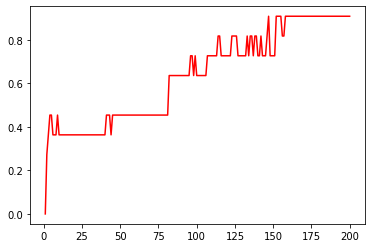

In [ ]:
import matplotlib.pyplot as plt

# 학습 결과에서 accuracy 값들을 가져온다
accuracy = h1.history["accuracy"]
# val_accuracy = h1.history["val_accuracy"]

# 반복 수
xaxis = range(1, len(accuracy)+1)
plt.plot(xaxis, accuracy, "r", label="train_accuracy")
# plt.plot(xaxis, val_accuracy, "b", label="test_accuracy")

- 문장을 생성하는 함수

In [ ]:
import numpy as np
# model : 사용한 모델
# t : 사용한 Tonkenizer
# word : 입력단어
# n : 입력단어로부터 예측할 단어 수
def generate_seqence(model, t, current_word, n) :
  init_word = current_word  # 입력된 단어로 시작해야 하므로 입력단어를 먼저 저장
  # 생성한 문장을 저장할 변수 초기화
  seq = ""
  for _ in range(n) :
    # 현재 단어를 인코딩하고 padding 처리를 수행
    encoded = t.texts_to_sequences([current_word])[0]
    encoded = pad_sequences([encoded], maxlen=max_len-1)
    # 현재 단어로 다음 단어를 예측 (인덱스 반환)
    result = np.argmax(model.predict(encoded))
    #print(result)
    for word, index in t.word_index.items() :
      # 예측한 단어와 동일한 인덱스의 단어가 있다면 종료
      if index == result :
        break
    # 현재단어와 예측한 단어를 연결
    current_word = current_word + " " + word
    seq = seq + " " + word
  seq = init_word + seq
  return seq

In [ ]:
generate_seqence(model1, t, "가는 말이", 10)

1/1 [==============================] - 0s 19ms/step


'가는 말이 고와야 오는 말이 곱다 오는 말이 곱다 오는 말이 곱다'